### Load the required moduels and libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Embedding

%matplotlib inline

#### Read restaurant sentiment data

In [6]:
df = pd.read_csv('./dataset/Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Check is target variable balanced

Text(0.5, 1.0, 'Count - Liked')

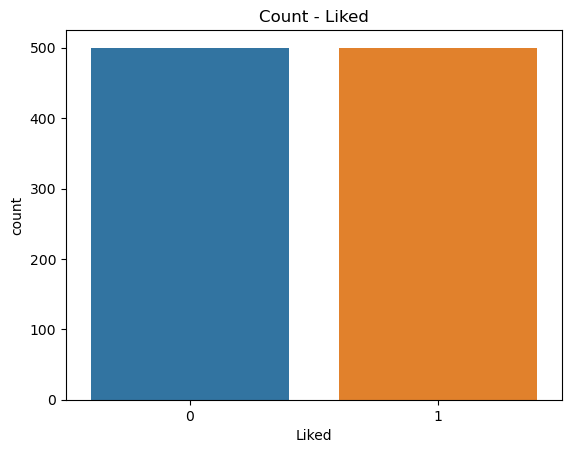

In [7]:
sns.countplot(data=df, x='Liked')
plt.title("Count - Liked")

#### Find how many recorda we have in dataset

In [8]:
df.shape

(1000, 2)

#### Check details of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

#### Violon Plot

Plot the Violin graph for the data to visualise the distribution of the data and its probability density.


Text(0.5, 1.0, 'Violin plot of Liked data')

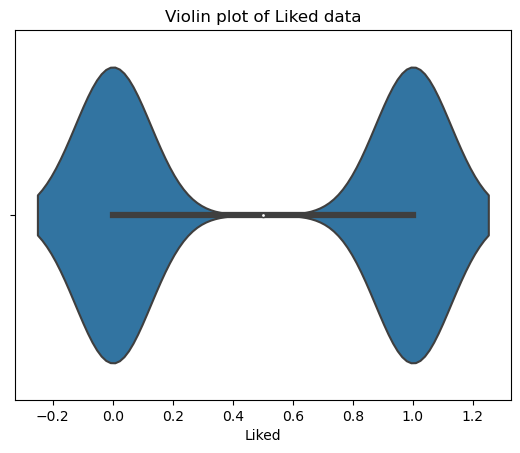

In [11]:
sns.violinplot(data=df, x='Liked')
plt.title('Violin plot of Liked data')

## Data Preprocessing

#### Find the longest sentence from the dataset

In [12]:
max_length = len(df['Review'][0])

for sent in df['Review']:
    if max_length < len(sent):
        max_length = len(sent)     
   
print("Longest sentence length is: ",max_length)

Longest sentence length is:  149


#### Find the smallest sentence from the dataset

In [13]:
min_length = len(df['Review'][0])

for sent in df['Review']:
    if min_length > len(sent):
        min_length = len(sent)

print("Smallest sentence length is: ",min_length)

Smallest sentence length is:  11


#### Extract X feature and y target

In [14]:
X = df['Review']
y = df['Liked']

In [15]:
# convert to array
y = np.array(y)
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

#### Tokenization

Tokenizer allows to vectorize a text corpus, by turning each text into either a sequence of integer or into a vector where the coefficient for each token could be binay, based on word count, if-idf..

This first convert the text into lower case, and if it find any out of vocabulary token, it replace with 'UNK'

In [16]:
tokenizer = Tokenizer(10000, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X)
X[1]

'Crust is not good.'

### Sequencing the text

This also remove unneccessary words which are not required for the processing

In [17]:
sequences = tokenizer.texts_to_sequences(X)

In [18]:
X[0]

'Wow... Loved this place.'

In [19]:
sequences[0]

[429, 166, 9, 16]

#### Padding the sequence on small length of text, performing pre padding

In [20]:
encode_seq = pad_sequences(sequences, maxlen=200, padding='pre')
encode_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

#### Save tokenized object for future use

In [21]:
if not os.path.exists('./model'):
    os.makedirs('./model')


with open('./model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Split dataset into train and test

In [22]:
final_input = encode_seq
final_output = y


In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_input,final_output,train_size=0.80, random_state=8)

In [24]:
print(X_train.shape, y_train.shape)

(800, 200) (800,)


### Model creation

1) Create sequential model

2) Perform embedding, this will close together all those elements which are semantically similar

3) LSTM Layer

4) Dropout layer to overcome overfitting issue

5) LSTM Layer

6) Output layer with sigmoid activation function

In [25]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=120, input_length = 200))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         94720     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-

### Train the model

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
prediction = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=5, batch_size=32)

Epoch 1/5
25/25 [==============================] - 13s 287ms/step - loss: 0.6939 - accuracy: 0.4950 - val_loss: 0.6920 - val_accuracy: 0.4500
Epoch 2/5
25/25 [==============================] - 5s 218ms/step - loss: 0.6121 - accuracy: 0.6762 - val_loss: 0.5067 - val_accuracy: 0.7500
Epoch 3/5
25/25 [==============================] - 6s 231ms/step - loss: 0.3234 - accuracy: 0.8988 - val_loss: 0.6591 - val_accuracy: 0.7650
Epoch 4/5
25/25 [==============================] - 6s 231ms/step - loss: 0.2166 - accuracy: 0.9388 - val_loss: 0.5865 - val_accuracy: 0.7800
Epoch 5/5
25/25 [==============================] - 8s 313ms/step - loss: 0.1081 - accuracy: 0.9712 - val_loss: 0.7168 - val_accuracy: 0.7600


#### Evaluate the model and check the accuracy of the test data

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

7/7 [==============================] - 0s 55ms/step - loss: 0.7168 - accuracy: 0.7600
Test Loss: 0.7168433666229248
Test Accuracy: 0.7599999904632568


#### Plot the required result data

In [28]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.747281727194786)

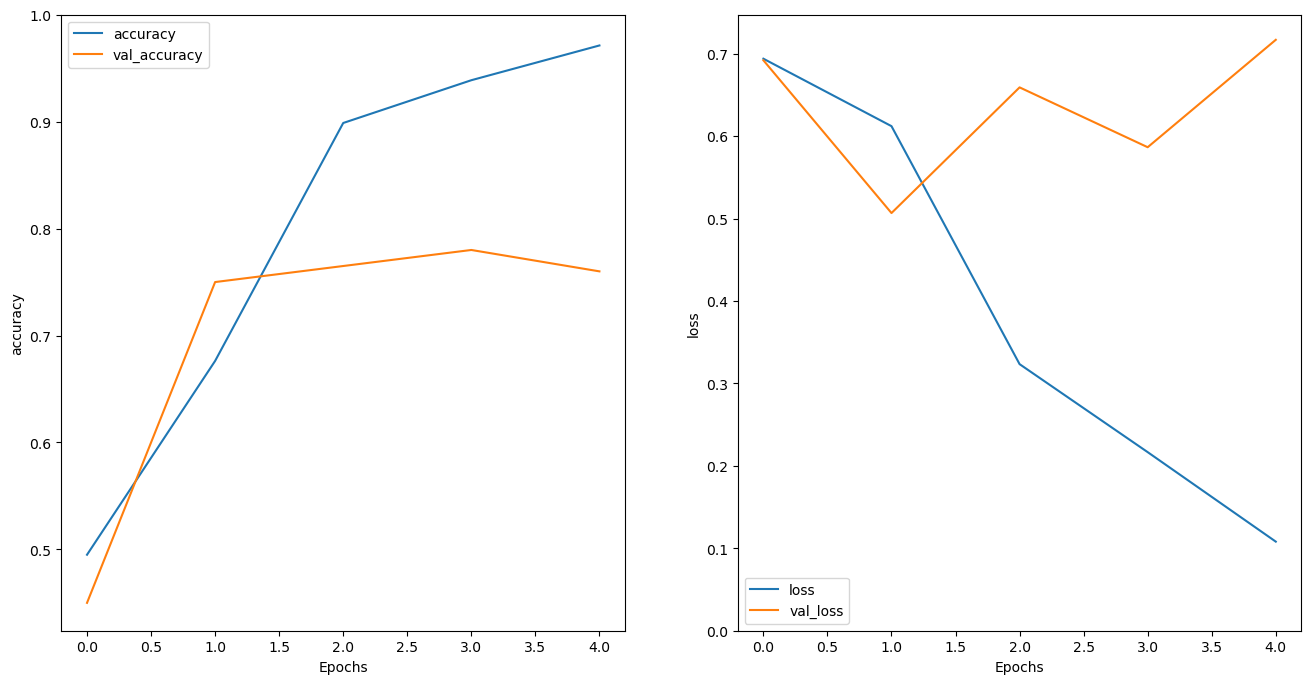

In [29]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(prediction, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(prediction, 'loss')
plt.ylim(0, None)

### Save model for reuse

In [30]:
model.save('./model/restaurant.h5')

#### Helper function to get prediction of the input feedback

In [36]:
def get_review(review):
    sentence_list = []
    sentence_list.append(review)
    sequences = tokenizer.texts_to_sequences(sentence_list)
    input = pad_sequences(sequences, maxlen=200, padding='pre')
    print(input)
    output = model.predict(input)
    print(output[0])
    
    if output[0] >= 0.5:    
        print("The feedback from user is Positive")    
        return 1
    else:
        print("The feedback from user is Negative")
        return 0        

In [37]:
get_review("the food was not good")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  2 12  5 13 17]]
1/1 [==============================] - 0s 60ms/step
[0.04625851]
The feedback from user is Negative


0

# REST Layer and User Interface layer

In [34]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS
import json

#### REST APIs

1) API: '/' with GET method will provide initial HTML user interface webpage.

   User can use http://127.0.0.1:5000/ on browser to access the webpage

2) API: '/review' With POST method will accept the user feedback given on HTML webpage and 

   start performing sentiment analysis of the feedback, based on prediction the UI will 

   display Positive or Negative message

In [35]:
app = Flask(__name__)
CORS(app)

@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')

@app.route('/review', methods = ['POST'])
def review():
    if request.method == 'POST':
        record = request.get_json()    
        user_feedback = record['review']
        prediction_val = get_review(user_feedback)    
        prediction = {}
        prediction['sentiment'] = prediction_val
        prediction['review'] = record['review']
        print(prediction)        
        return json.dumps(prediction)
    
if __name__ == "__main__":
    app.run(use_reloader=False)


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/brand_logo.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/restaurant_image.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/like.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/dislike.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/brand_logo.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/restaurant_image.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/dislike.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /static/images/like.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Dec/2022 15:58:49] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 61ms/step


127.0.0.1 - - [14/Dec/2022 15:59:00] "POST /review HTTP/1.1" 200 -


[0.02566443]
The feedback from user is Negative
{'sentiment': 0, 'review': 'I do not like your food'}
1/1 [==============================] - 0s 60ms/step


127.0.0.1 - - [14/Dec/2022 15:59:26] "POST /review HTTP/1.1" 200 -


[0.97781616]
The feedback from user is Positive
{'sentiment': 1, 'review': 'the taste was great and delcious'}
1/1 [==============================] - 0s 45ms/step


127.0.0.1 - - [14/Dec/2022 15:59:33] "POST /review HTTP/1.1" 200 -


[0.98183715]
The feedback from user is Positive
{'sentiment': 1, 'review': 'the taste was great and delicious'}
